## Detecting seizures on EEG - Milestone 4 &5

### CS 109A Data Science, Harvard University


**Hannah Bend, Sanjay Tiwari, Sathish Kumar, Yohann Smadja**

In [1]:
#!pip install pyedflib
#!pip install PyWavelets

import pyedflib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pywt
from PIL import Image
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [24]:
chb01_21_seisure_df = pd.read_csv('chb01_21_seisure.csv')
chb01_21_seisure_df = chb01_21_seisure_df.drop(chb01_21_seisure_df.columns[[-1]], axis=1)
chb01_26_seisure_df = pd.read_csv('chb01_26_seisure.csv')
chb01_26_seisure_df = chb01_26_seisure_df.drop(chb01_26_seisure_df.columns[[-1]], axis=1)
chb01_37_normal_1_df = pd.read_csv('chb01_37_normal_1.csv')
chb01_37_normal_1_df = chb01_37_normal_1_df.drop(chb01_37_normal_1_df.columns[[-1]], axis=1)
chb01_37_normal_1_df = pd.read_csv('chb01_37_normal_1.csv')
chb01_37_normal_1_df = chb01_37_normal_1_df.drop(chb01_37_normal_1_df.columns[[-1]], axis=1)
chb01_38_normal_1_df = pd.read_csv('chb01_38_normal_1.csv')
chb01_38_normal_1_df = chb01_38_normal_1_df.drop(chb01_38_normal_1_df.columns[[-1]], axis=1)
print chb01_21_seisure_df.shape
chb01_21_seisure_df.head(n=2)

(23809, 22)


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,FP2-F8,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8
0,-23.638584,-36.141636,-19.731380,-25.201465,-0.195360,-21.294261,-43.174603,-39.267399,3.711844,-104.126984,...,-8.791209,-87.326007,-70.134310,13.089133,-92.405372,-34.188034,20.122100,-1.758242,32.625153,-57.240537
1,-21.684982,-41.221001,-27.936508,-22.857143,-1.367521,-25.592186,-48.644689,-38.485958,-4.102564,-117.802198,...,-5.274725,-106.862027,-78.339438,29.890110,-98.266178,-23.638584,28.327228,6.056166,22.075702,-71.697192


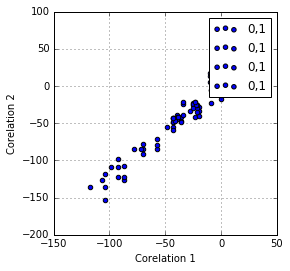

In [25]:
plt.figure(figsize=(4,4))
plt.scatter(chb01_21_seisure_df.iloc[0].values, chb01_21_seisure_df.iloc[1].values, label='0,1')
plt.scatter(chb01_21_seisure_df.iloc[0].values, chb01_21_seisure_df.iloc[2].values, label='0,1')
plt.scatter(chb01_21_seisure_df.iloc[0].values, chb01_21_seisure_df.iloc[3].values, label='0,1')
plt.scatter(chb01_21_seisure_df.iloc[1].values, chb01_21_seisure_df.iloc[2].values, label='0,1')

plt.xlabel('Corelation 1'); plt.ylabel('Corelation 2')
plt.legend(loc='best')
plt.grid()
plt.show()


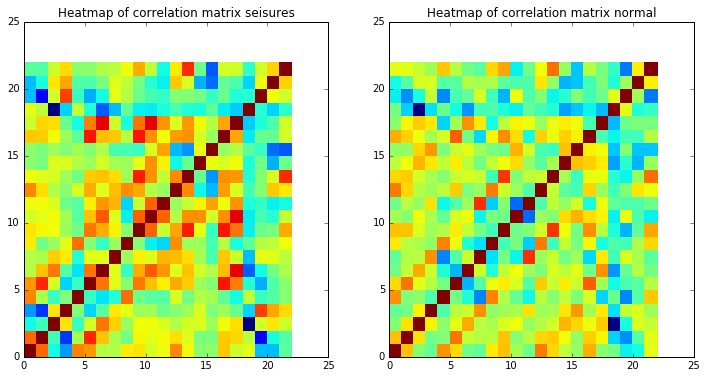

In [26]:
# Compute matrix of correlation coefficients
corr_matrix_chb01_37_normal_1_df = np.corrcoef(chb01_37_normal_1_df.T)
corr_matrix_chb01_21_seisure_df = np.corrcoef(chb01_21_seisure_df.T)

# Display heat map 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pcolor(corr_matrix_chb01_21_seisure_df)
ax2.pcolor(corr_matrix_chb01_37_normal_1_df)
ax1.set_title('Heatmap of correlation matrix seisures')
ax2.set_title('Heatmap of correlation matrix normal')

plt.show()

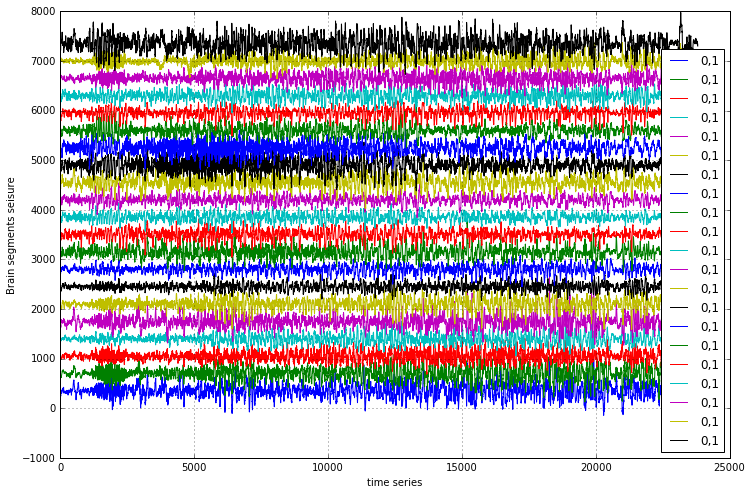

In [27]:
plt.figure(figsize=(12,8))
ts = np.arange(0, chb01_21_seisure_df.shape[0], 1)
max_pred = chb01_21_seisure_df.shape[1] -1
sep = 0
for i in (range(0, max_pred)):
    sep += 350
    cleaned_sep = chb01_21_seisure_df.ix[:, i].values + sep
    plt.plot(ts, cleaned_sep, label='0,1')
plt.xlabel('time series'); plt.ylabel('Brain segments seisure')
plt.legend(loc='best')
plt.grid()
plt.show()

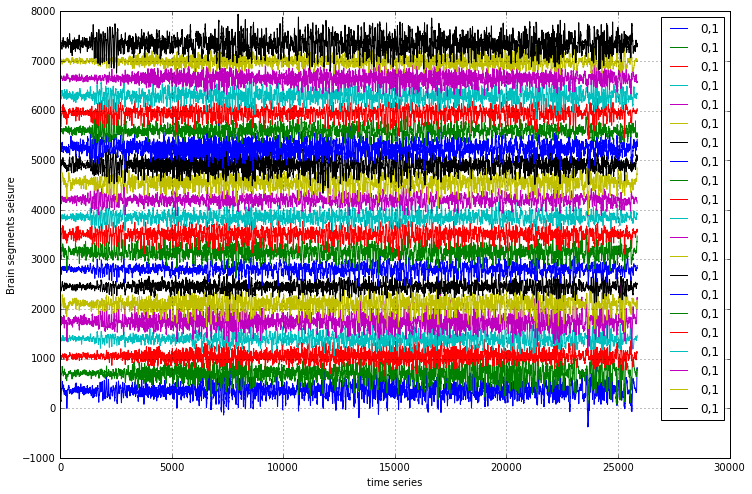

In [28]:
plt.figure(figsize=(12,8))
ts = np.arange(0, chb01_26_seisure_df.shape[0], 1)
max_pred = chb01_26_seisure_df.shape[1] -1
sep = 0
for i in (range(0, max_pred)):
    sep += 350
    cleaned_sep = chb01_26_seisure_df.ix[:, i].values + sep
    plt.plot(ts, cleaned_sep, label='0,1')
plt.xlabel('time series'); plt.ylabel('Brain segments seisure')
plt.legend(loc='best')
plt.grid()
plt.show()

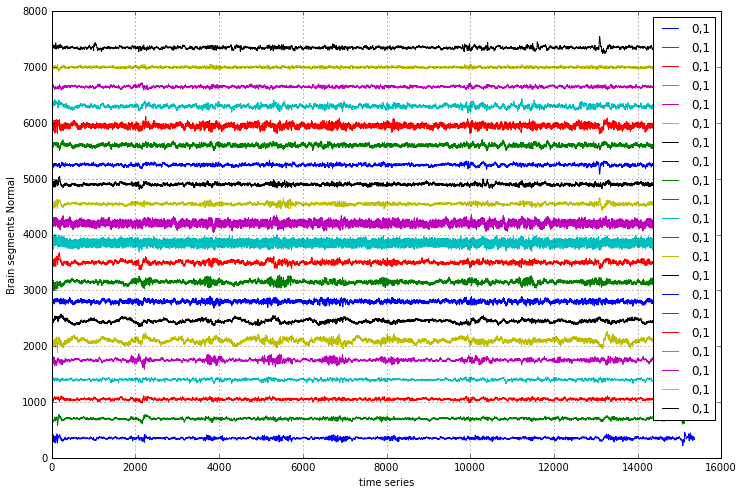

In [29]:
plt.figure(figsize=(12,8))
ts = np.arange(0, chb01_37_normal_1_df.shape[0], 1)
max_pred = chb01_37_normal_1_df.shape[1] -1
sep = 0
for i in (range(0, max_pred)):
    sep += 350
    cleaned_sep = chb01_37_normal_1_df.ix[:, i].values + sep
    plt.plot(ts, cleaned_sep, label='0,1')
plt.xlabel('time series'); plt.ylabel('Brain segments Normal')
plt.legend(loc='best')
plt.grid()
plt.show()

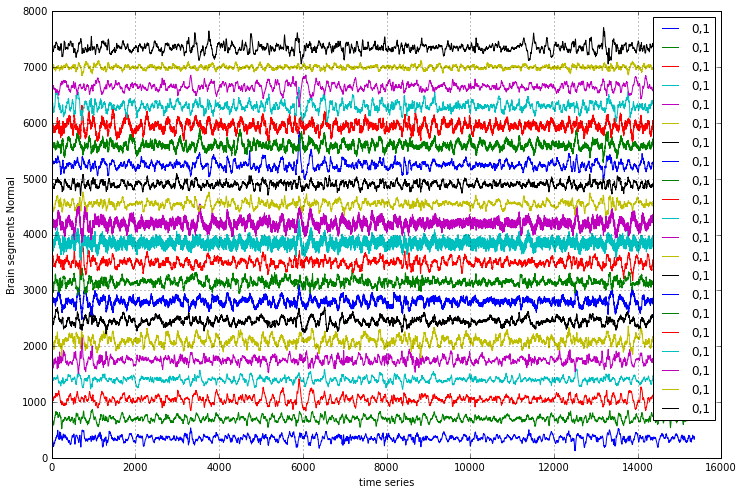

In [30]:
plt.figure(figsize=(12,8))
ts = np.arange(0, chb01_38_normal_1_df.shape[0], 1)
max_pred = chb01_38_normal_1_df.shape[1] -1
sep = 0
for i in (range(0, max_pred)):
    sep += 350
    cleaned_sep = chb01_38_normal_1_df.ix[:, i].values + sep
    plt.plot(ts, cleaned_sep, label='0,1')
plt.xlabel('time series'); plt.ylabel('Brain segments Normal')
plt.legend(loc='best')
plt.grid()
plt.show()